In [ ]:
# Statsmodels - Time series libraries

In [ ]:
# References
[statsmodels - Time Series libraries](https://www.statsmodels.org/stable/tsa.html)
[Decomposition by Oracle](https://blogs.oracle.com/ai-and-datascience/post/decomposition-based-approaches-to-time-series-forecasting)


In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
sns.set()

# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option("display.precision", 6)

# optional
#pd.set_option('display.max_columns',100)
sns.set_style('darkgrid')


In [3]:
# Load data

# path = 'e:\PycharmProjects\TimeSeries'
path = os.path.abspath(os.getcwd())

# load apple, google data 
bsz_file = 'balatoni_szallasok.csv'
path_to_bsz_file = os.path.join(path, 'data', bsz_file)
df = pd.read_csv(path_to_bsz_file, parse_dates=["Month"],index_col="Month",).dropna()


In [8]:
# Quick check

df.sample(5)
df.head(5)
df.tail(5)

,bNr
Month,
2023-02-01,4
2023-03-01,7
2023-04-01,7
2023-05-01,11
2023-06-01,20


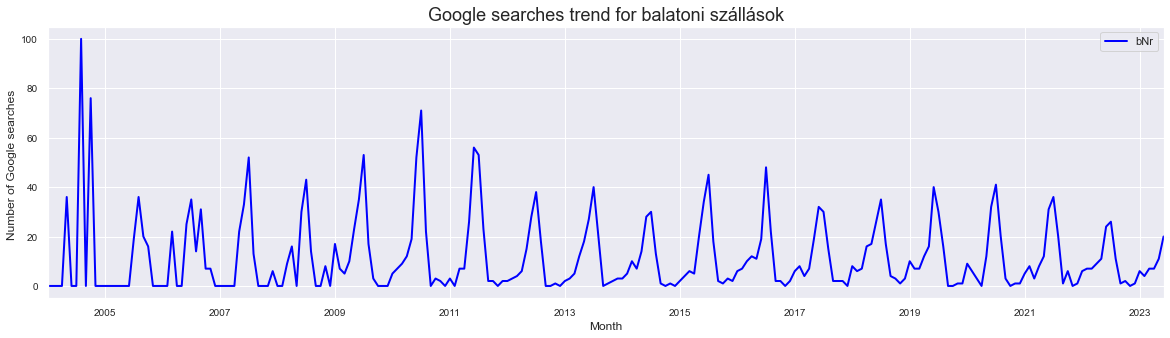

In [14]:
# Basic visualisation

# Plot the time series in your DataFrame
ax = df.plot(color='blue', figsize=(20, 5), linewidth=2, fontsize=10)

# Specify the x-axis label in your plot
ax.set_xlabel('Month')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of Google searches ')

# Specify the title in your plot
ax.set_title('Google searches trend for balatoni szállások', fontsize=18)


# Show plot
plt.show()


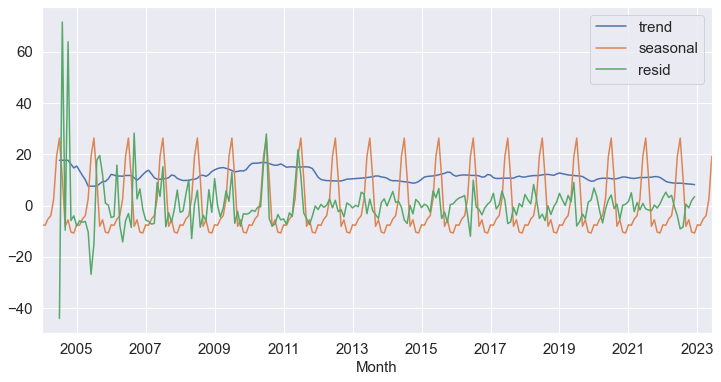

In [31]:
# Decomposition of a time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive') #multiplicative


#print(results.trend)
#print(results.seasonal)
#print(results.resid)
#print(results.observed)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid
observed = decomposition.observed
df_decomposed = pd.concat([trend, seasonal, resid], axis=1)


# Plot the values of the airline_decomposed DataFrame
ax = df_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Month', fontsize=15)
plt.legend(fontsize=15)
plt.show()

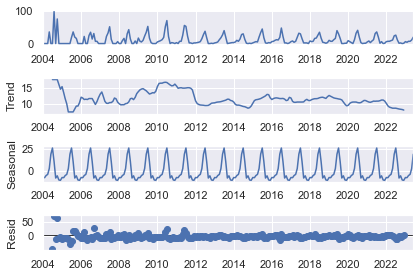

In [29]:
# All in one visualisation
decomposition.plot()
plt.show()

In [ ]:
# To remove trend and seasonality from a time series, you can use the process of deseasonalization and detrending. Here's a common approach using 
#the differencing method:
#Compute the trend component using a rolling average or any other appropriate method. 
#Here, we'll use a simple moving average with a window size of your choice:

window_size = 10  # Adjust the window size as needed
rolling_mean = data.rolling(window=window_size).mean()

#Compute the seasonal component by taking the average values for each season. This step assumes that the seasonality repeats over fixed periods. 
#For example, if you have monthly data and want to remove the monthly seasonality, you can calculate the average values for each month:

seasonal_data = data.groupby(data.index.month).mean()
deseasonalized_data = detrended_data - seasonal_data

plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(data, label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(rolling_mean, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal_data, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(deseasonalized_data, label='Deseasonalized')
plt.legend()

plt.tight_layout()
plt.show()
This code will create a 4-subplot figure showing the original data, trend component, seasonal component, and the deseasonalized data.

#By removing the trend and seasonality, you can focus on the residual component, which contains the remaining patterns and irregularities in the time 
#series.






